## Lead Scoring Case Study
### Model to build most promising leads that are most likely to convert into paying customers for "X EDUCATION"

In [754]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [755]:
# Importing Pandas and NumPy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [756]:
# Importing source datasets
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Inspecting Data Frame

In [757]:
# Let's check the dimensions of the dataframe
leads.shape

(9240, 37)

In [758]:
# let's look at the statistical aspects of the dataframe
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [759]:
# Let's see the type of each column
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

### I see quite a lot of null columns which needs to be looked upon.

### First step I want to replace all 'select' in dataset with NaN values

In [760]:
leads = leads.replace('Select', np.NaN)

In [761]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [762]:
# Dropping unique primary key cols, as I do not see much importance to draw from them at this moment.
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [763]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Finding Null values columns

In [764]:
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [765]:
#finding percentage of null values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [766]:
#dropping cols with more than 45% missing values
leads = leads.drop(columns  = ['Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Activity Index', 'Lead Profile', 'Lead Quality', 'How did you hear about X Education'])

In [767]:
leads.shape

(9240, 28)

### Understanding Data, Performing EDA, Knowing what's coming in data for their domain values, taking actions about such columns

In [768]:
leads['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

#### 30% of 'A free copy of Mastering The Interview' are Yes. Majority of them have 'No'. Worth retaining this column at the moment. Lets inspect others.

In [769]:
leads['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

#### A classic example of 'Class Imbalance' entire 100% of data has same value. Worth of dropping this column.

In [770]:
leads = leads.drop(columns  = ['I agree to pay the amount through cheque'])

In [771]:
leads['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [772]:
round(100*(leads['City'].isnull().sum()/len(leads.index)), 2)

39.71

#### 39% of rows in City are seen to have null values. Mumbai is seen as Mode or most frequent value in dataset, replacing nulls with Mumbai City.

In [773]:
leads.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

In [774]:
leads.City.value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

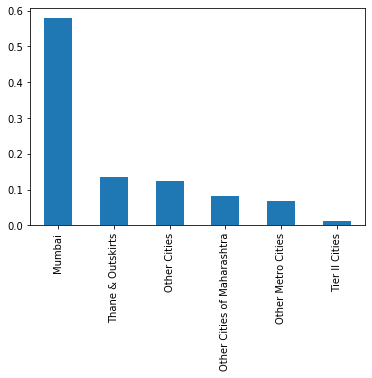

In [775]:
leads.City.value_counts(normalize=True).plot.bar()

In [776]:
#Replacing Null and NaN rows with Most Frequent City
leads['City'] = leads['City'].replace(np.nan,'Mumbai')

In [777]:
#Inspecting column to see counts, checking if there's any data imbalance
leads.City.value_counts(normalize=True)

Mumbai                         0.745779
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [778]:
leads['City'].isnull().sum()

0

### OK, we are good to move on to next column

In [779]:
leads['Get updates on DM Content'].value_counts(normalize=True)

No    1.0
Name: Get updates on DM Content, dtype: float64

In [780]:
#Thanks to this column for allowing me to delete it under class imbalance category
leads = leads.drop(columns  = ['Get updates on DM Content'])

In [781]:
# Looks like we would loose one more friend in class imbalance
leads['Update me on Supply Chain Content'].value_counts(normalize=True)

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

In [782]:
leads = leads.drop(columns  = ['Update me on Supply Chain Content'])

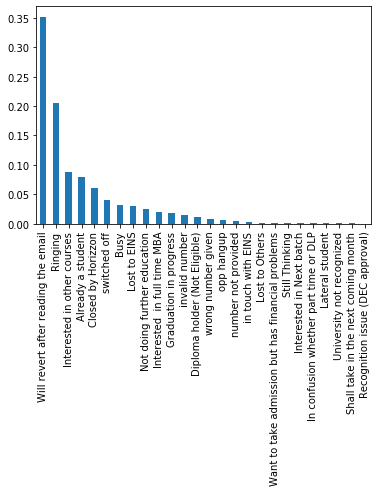

In [783]:
#Plotting next col "Tags"
leads.Tags.value_counts(normalize=True).plot.bar()

In [784]:
leads.Tags.value_counts(normalize=True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

### This has lot of discrete & less density domain values.. Example, Recognition issue only has 1 out of 9244. 
### Similarly Lost to Others and other values. I would want to group and combine such low density less frequenty values to 'Misc or Other Category'

In [785]:
#Hoping there are no nulls in this column. Oops there are...
leads['Tags'].isnull().sum()

3353

In [786]:
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [787]:
##1. Treating Missed Values
##2. Group less frequent data together as Misc Tags

## I am unable to take a call to replace nulls with most frequent value , as we do not know what could be there in place of nulls. Hence I shall put them as unknown for now.
leads['Tags'] = leads['Tags'].replace(np.nan,'Unknown')

In [788]:
leads['Tags'].value_counts(dropna=False)

Unknown                                              3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

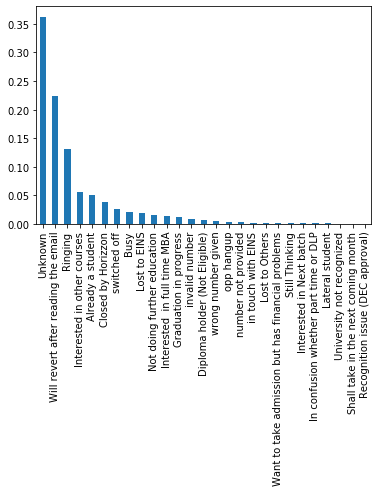

In [789]:
leads.Tags.value_counts(normalize=True).plot.bar()

In [790]:
## I'll now group thin domain values as Misc 
leads['Tags'] = leads['Tags'].replace(['switched off','Lost to EINS', 'Not doing further education', 'Interested  in full time MBA',
                                     'Graduation in progress','Diploma holder (Not Eligible)', 'opp hangup','in touch with EINS',
                                     'Lost to Others','Want to take admission but has financial problems','Interested in Next batch',
                                     'In confusion whether part time or DLP','Lateral student', 'Shall take in the next coming month',
                                     'University not recognized','Recognition issue (DEC approval)','Still Thinking'], 'Misc')

In [791]:
leads['Tags'].value_counts(dropna=False)

Unknown                                3353
Will revert after reading the email    2072
Ringing                                1203
Misc                                    933
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Busy                                    186
invalid number                           83
wrong number given                       47
number not provided                      27
Name: Tags, dtype: int64

In [792]:
## Further group number related response together
leads['Tags'] = leads['Tags'].replace(['invalid number', 'wrong number given', 'number not provided'], 'No_Number')

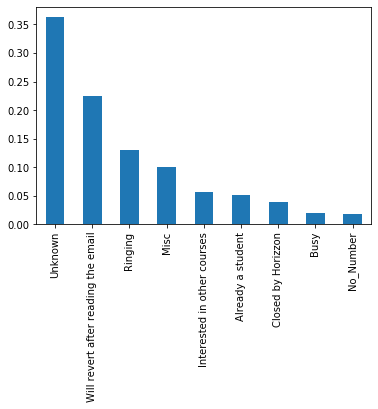

In [793]:
leads.Tags.value_counts(normalize=True).plot.bar()

In [794]:
leads['Tags'].value_counts(dropna=False)
#Tags column is good to go

Unknown                                3353
Will revert after reading the email    2072
Ringing                                1203
Misc                                    933
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Busy                                    186
No_Number                               157
Name: Tags, dtype: int64

In [795]:
#One more column with class imbalance to be dropped
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [796]:
leads = leads.drop(columns  = ['Receive More Updates About Our Courses'])

In [797]:
leads['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [798]:
##Can remove this row as well
leads = leads.drop(columns  = ['Through Recommendations'])

In [799]:
## How are you looking like Digital Advertisement?
leads['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [800]:
## Oops you too fall into Class Imbalance. Let me drop you
leads = leads.drop(columns  = ['Digital Advertisement'])

In [801]:
leads['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [802]:
## Sorry Buddy, I had to drop you due to data imbalance. 2020 is not our year.
leads = leads.drop(columns  = ['Newspaper'])

In [803]:
## Joins the list...
leads['X Education Forums'].value_counts(dropna=False)
leads = leads.drop(columns  = ['X Education Forums'])

In [804]:
leads['Newspaper Article'].value_counts(dropna=False)
leads = leads.drop(columns  = ['Newspaper Article'])

In [805]:
#And... the list grows one more with Magazine
leads['Magazine'].value_counts(dropna=False)
leads = leads.drop(columns  = ['Magazine'])

In [806]:
leads['Search'].value_counts(dropna=False)
leads = leads.drop(columns  = ['Search'])

In [807]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [808]:
leads['What matters most to you in choosing a course'].value_counts(normalize=True,dropna=False)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

#### With about 30% of rows have NaN, 70% as 'Better Career Prospects' this column add me more sense towards dropping it. Even if I impute NaN data, it would still result in Data Imbalance. Let me drop this row.

In [809]:
leads = leads.drop(columns  = ['What matters most to you in choosing a course'])

In [810]:
leads['What is your current occupation'].value_counts(normalize=True,dropna=False)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

#### Interesting Column. I want to replace NaN as Not Specified and draw outcomes out of it.

In [811]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Not Specified')

In [812]:
leads['What is your current occupation'].value_counts(normalize=True,dropna=False)
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
Not Specified           2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

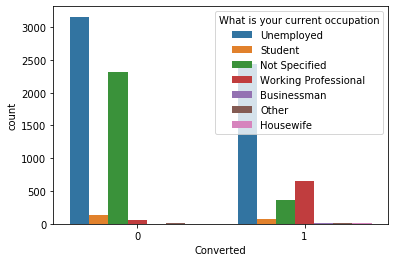

In [813]:
sns.countplot(x="Converted", hue="What is your current occupation", data=leads)

### Among Converted leads, we have Unemployed has a considerable contribution.
### In Not Converted leads, Unemployed, Not Specified are playing good part. I don't want to merge Not Specified as Unemployed at this moment

In [814]:
# Merging Housewife, Other, Business as Other for their little numbers
leads['What is your current occupation'] = leads['What is your current occupation'].replace(['Businessman', 'Housewife', 'Other'], 'Other')

In [815]:
leads['What is your current occupation'].value_counts(normalize=True,dropna=False)

Unemployed              0.606061
Not Specified           0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.003680
Name: What is your current occupation, dtype: float64

In [816]:
leads['Specialization'].value_counts(normalize=True,dropna=False)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [817]:
leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### About 36% rows in this column are nulls. I am not able to comprehend NaN to any other most frequent value. Hence, ill replace all NaN as not specified and draw conclusions against target variable

In [818]:
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

In [819]:
# Shall we coil similar kind of specializations as one?
leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management', 
                                     'Marketing Management','Operations Management', 'IT Projects Management',
                                     'Supply Chain Management','Healthcare Management','Hospitality Management',
                                     'Retail Management'], 'Management')

In [820]:
leads['Specialization'].value_counts(dropna=False)

Management                           4253
Not Specified                        3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [821]:
## All Business Specialization as one group?

In [822]:
leads['Specialization'] = leads['Specialization'].replace(['Rural and Agribusiness','E-Business', 
                                     'International Business'], 'Business')

In [823]:
leads['Specialization'].value_counts(dropna=False)

Management                           4253
Not Specified                        3380
Business Administration               403
Banking, Investment And Insurance     338
Business                              308
Media and Advertising                 203
Travel and Tourism                    203
E-COMMERCE                            112
Services Excellence                    40
Name: Specialization, dtype: int64

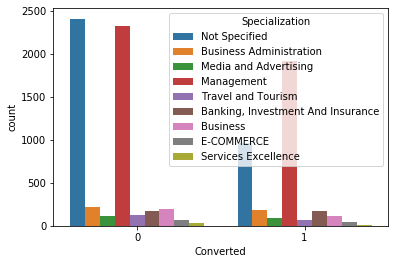

In [824]:
##How about a count plot now?
sns.countplot(x="Converted", hue="Specialization", data=leads)

#### Looks pretty cool. Not Specified or Management Specializations are not likely to convert compared to others.

In [825]:
leads['Country'].value_counts(dropna=False)
## Another column to drop.. India shows sheer dominance in list, NaN can be replaced with India and leading to Imbalance. Lets drop the row
leads = leads.drop(columns  = ['Country'])

In [826]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [827]:
leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')

### Can we group similar action items to one again?

In [828]:
leads['Last Activity'] = leads['Last Activity'].replace(['Resubscribed to emails','Visited Booth in Tradeshow', 
                                                         'Email Marked Spam','Email Received',
                                                         'View in browser link Clicked', 'Approached upfront',
                                                         'Had a Phone Conversation', 'Unsubscribed', 'Unreachable',
                                                         'Others'], 'Not_turned')

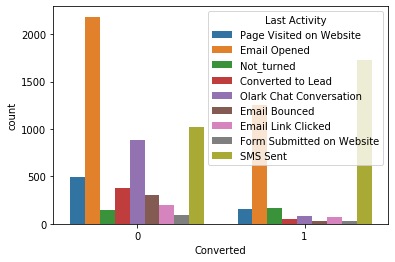

In [829]:
sns.countplot(x="Converted", hue="Last Activity", data=leads)

#### Insights from here are: Although people opened the E-Mail high chances they are not converted as lead. Here, even though last activity is shown 'Converted to Lead' are seen falling in Converted = 0 . Surprise!

In [830]:
#There are nulls around 'Total Time Spent on Website' and 'Page Views Per Visit' cols. Using interpolate function we fill values
leads['Total Time Spent on Website'].interpolate(inplace = True)
leads['Page Views Per Visit'].interpolate(inplace = True)

In [831]:
leads['TotalVisits'].interpolate(inplace = True)

In [832]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               0.00
Total Time Spent on Website               0.00
Page Views Per Visit                      0.00
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [833]:
leads['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [834]:
#This column can be dropped
leads = leads.drop(columns  = ['Do Not Call'])

In [835]:
leads['Do Not Email'].value_counts(normalize=True,dropna=False)

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

In [836]:
#This column can be dropped
leads = leads.drop(columns  = ['Do Not Email'])

In [837]:
leads['Lead Source'].value_counts(normalize=True,dropna=False)

Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Social Media         0.000216
Live Chat            0.000216
Press_Release        0.000216
NC_EDM               0.000108
blog                 0.000108
welearnblog_Home     0.000108
testone              0.000108
Pay per Click Ads    0.000108
WeLearn              0.000108
youtubechannel       0.000108
Name: Lead Source, dtype: float64

In [838]:
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
NC_EDM                  1
blog                    1
welearnblog_Home        1
testone                 1
Pay per Click Ads       1
WeLearn                 1
youtubechannel          1
Name: Lead Source, dtype: int64

### All less dense sources can be grouped as Misc

In [839]:
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')

In [840]:
leads['Lead Source'] = leads['Lead Source'].replace(['youtubechannel','Facebook'],'Social Media')

In [841]:
leads['Lead Source'] = leads['Lead Source'].replace(['Others','bing','Click2call','Press_Release', 'Live Chat',
                                                     'Press_Release','blog', 'welearnblog_Home',
                                                     'Pay per Click Ads','blog','WeLearn',
                                                    'testone','NC_EDM'] ,'Misc')    

In [842]:
leads['Lead Source'].value_counts(dropna=False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          58
Misc                  56
Name: Lead Source, dtype: int64

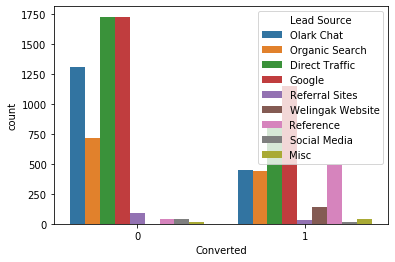

In [843]:
sns.countplot(x="Converted", hue="Lead Source", data=leads)

### Direct Traffic and Google Sources are not reliable in this context

In [844]:
    leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [845]:
# This column remains As-Is at this moment

In [846]:
#Checking NullValue rows
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

### Check on Imbalance for converted column and it seems to look good

In [847]:
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

38.53896103896104

### Univariate & Bivariate Analysis

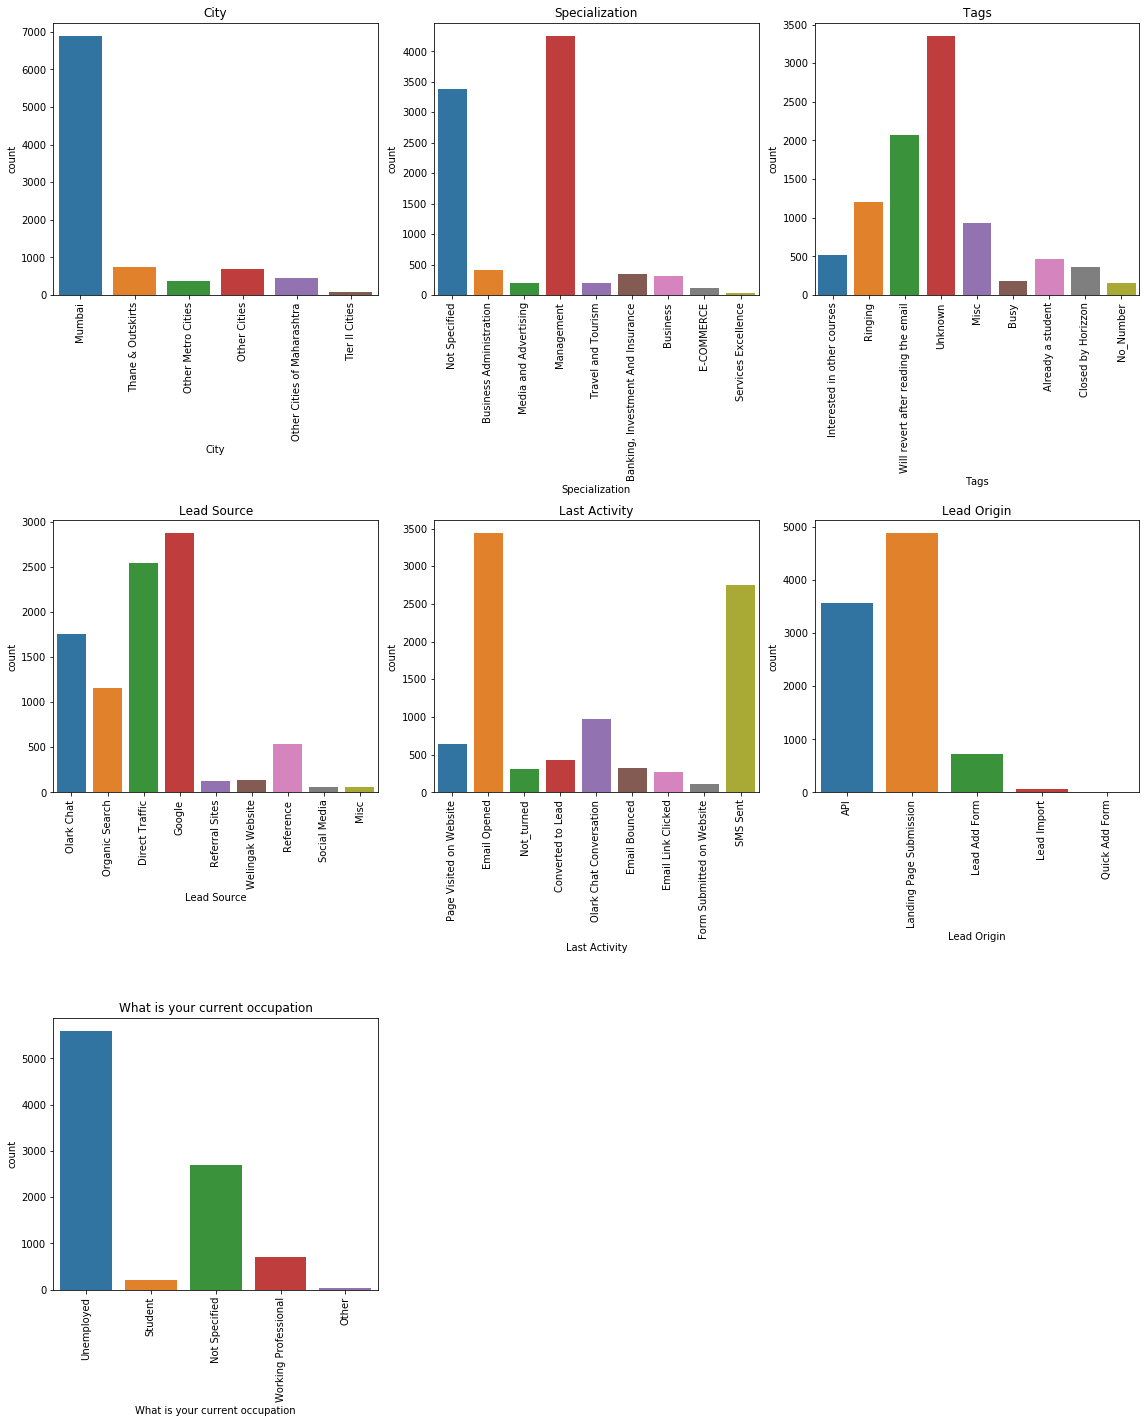

In [848]:
categ = ["City", "Specialization", "Tags","Lead Source", "Last Activity", "Lead Origin", "What is your current occupation"]
i=1
plt.figure(figsize = (16,25))
for x in categ:
    plt.subplot(4,3,i)
    sns.countplot(x  = leads[x])
    plt.title(x)
    i+=1
    plt.xticks(rotation = 90)
plt.tight_layout(pad=1.0)
plt.show()

### Inferences from about plots:
1) Most of views come from Mumbai city
2) Highest number of views come from Management specialization , next come from Not Specified List
3) There were predominant numbers of Tags missing where we are unable to conclude on leads next course of action
4) Leads did come highly from Google and Direct Sources
5) Last Acitivity seen from most of leads was 'E-Mail opened' or 'SMS Sent'
6) Unemployed Leads dominate the dataset
7) Landing Pagse Submission had highest lead origin

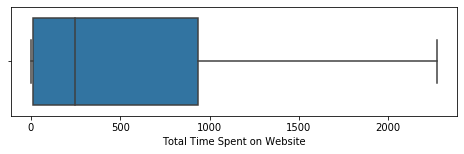

In [849]:
plt.figure(figsize=[8,2])
sns.boxplot(leads['Total Time Spent on Website'])
plt.show()

#### Seen that there are no predominant outliers, median is around 250 min spent around website and highest at 2000 min

In [850]:
leads['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

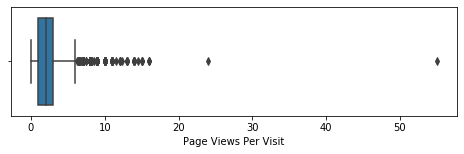

In [851]:
plt.figure(figsize=[8,2])
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

In [852]:
leads['Page Views Per Visit'].describe()

count    9240.000000
mean        2.353850
std         2.154545
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

#### Min of 0 to max 55 visits were max by users on page.

### Bivariate Analysis

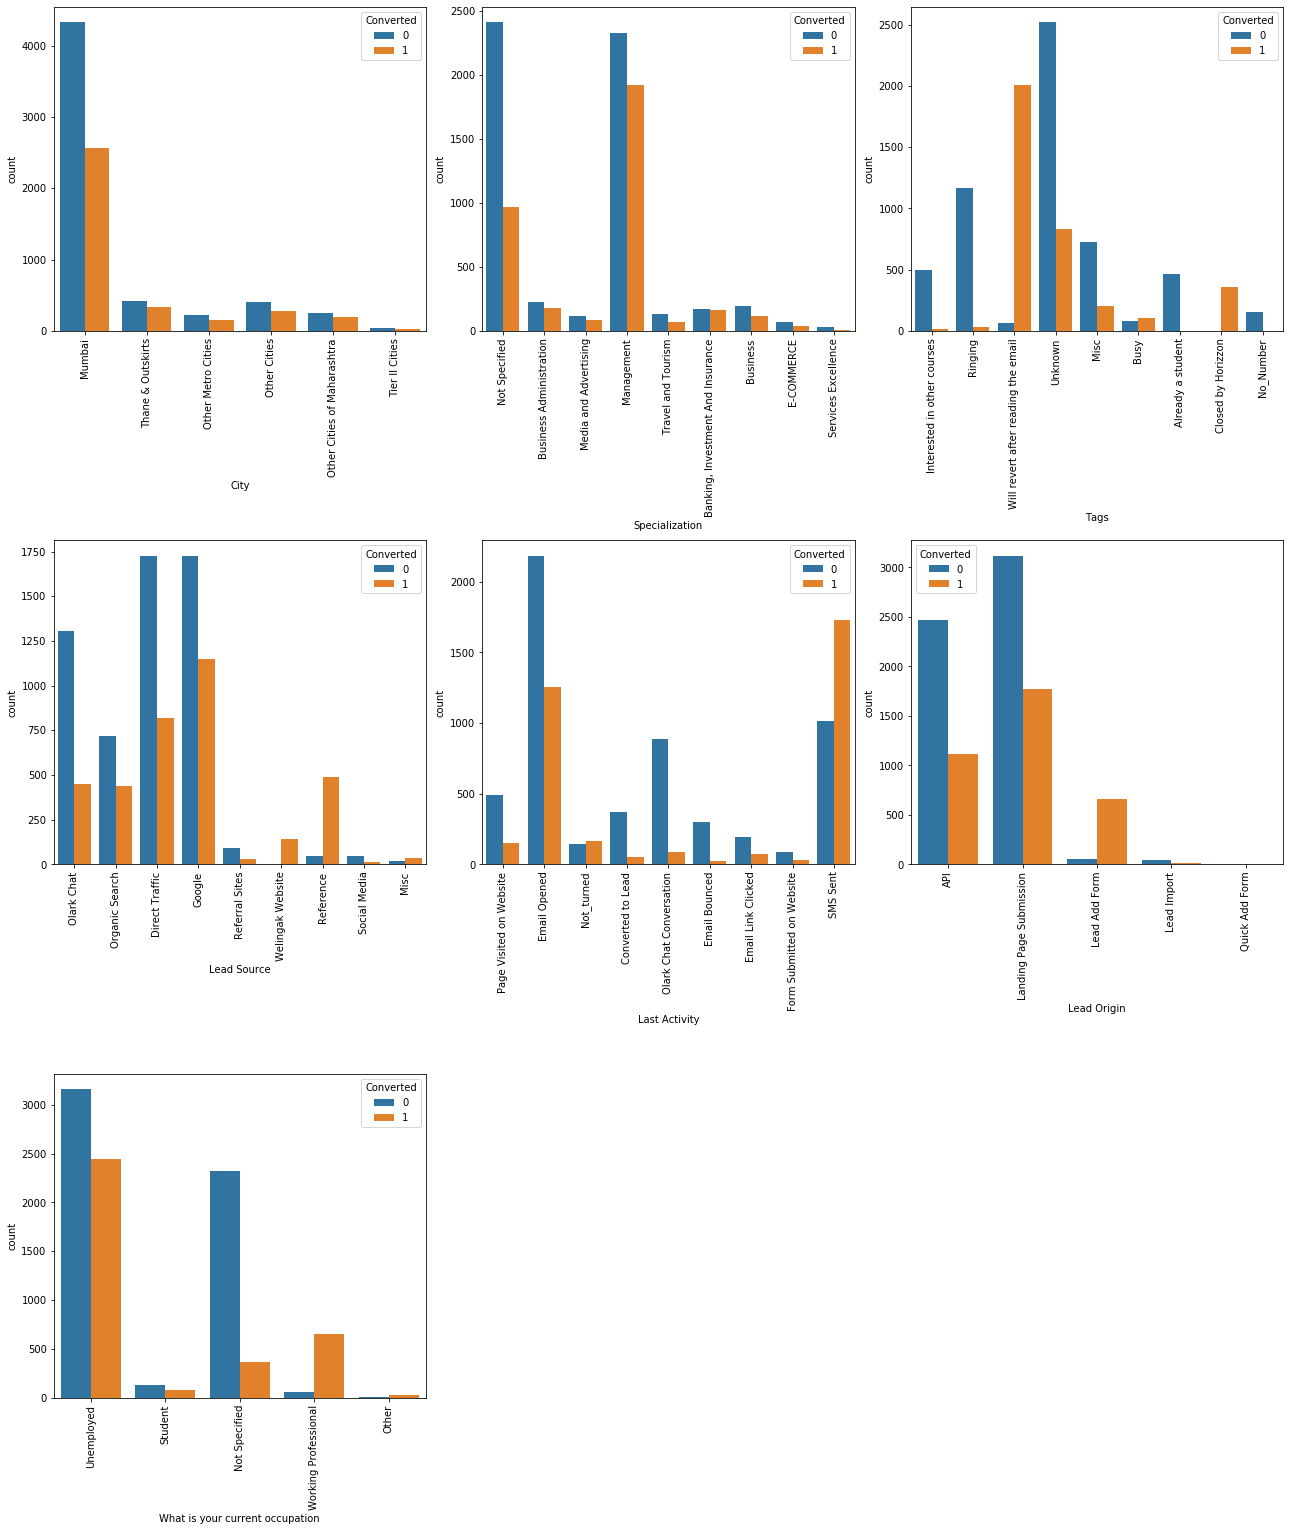

In [853]:
i = 1
plt.figure(figsize = (18,27))
for x in categ:
    plt.subplot(4,3,i)
    sns.countplot( x = leads[x], hue = leads.Converted)
    plt.xticks(rotation = 90)    
    i+=1
plt.tight_layout(pad=1.0)
plt.show()

#### Inferences from above plot:
#### Unemployed and occupation 'Not specified' are having less chances to get converted.
#### Lead origin API & Landing Page Submission are less getting converted
#### When SMS is sent by user, good chances he/she gets converted. E-Mail opened by user doesn't assure user is converted most of cases
#### Google & Direct sources aren't reliable as far as conversion is concerned.
#### Unknown tags are gone case usually, Users who said 'I'll revert after reading email' are getting converted
#### Specialization category 'Not Specified' and Management are among less converted leads

### Correlation Matrix

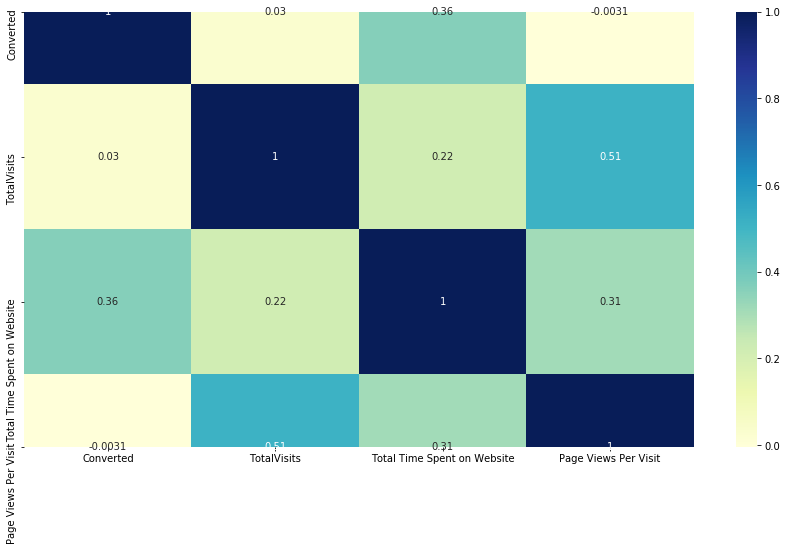

In [854]:
plt.figure(figsize=(15,8))

sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

###  converted and page views per visit are negatively correlated.
### Total Visits and Page views per visit are well correlated, second being page views per visit vs total time spent on website.

In [855]:

transform =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# converting Yes or No to binary values
leads[transform] = leads[transform].apply(binary_map)

In [856]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9240 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9240 non-null float64
Last Activity                             9240 non-null object
Specialization                            9240 non-null object
What is your current occupation           9240 non-null object
Tags                                      9240 non-null object
City                                      9240 non-null object
A free copy of Mastering The Interview    9240 non-null int64
Last Notable Activity                     9240 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 938.6+ KB


### Treating Outlilers

In [857]:
num_leads = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [858]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.432576,487.698268,2.353850
std,4.830340,548.021466,2.154545
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


#### A few observations here are in all these 3 continous numericals, there's a huge difference between 99% and the Maximum. We can clip less than 1% and greater than 99%, their density should be less and shouldn't harm us.

In [859]:
#Performing Outlier treatment only for 1% and 99%
for x in num_leads.columns:
    q1,q3 = np.quantile(leads[x], [0.01,0.99])
    iqr = q3-q1
    leads = leads[(leads[x] > q1-1.5*iqr) & (leads[x] < q1+1.5*iqr) ]

In [860]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9201 entries, 0 to 9239
Data columns (total 13 columns):
Lead Origin                               9201 non-null object
Lead Source                               9201 non-null object
Converted                                 9201 non-null int64
TotalVisits                               9201 non-null float64
Total Time Spent on Website               9201 non-null int64
Page Views Per Visit                      9201 non-null float64
Last Activity                             9201 non-null object
Specialization                            9201 non-null object
What is your current occupation           9201 non-null object
Tags                                      9201 non-null object
City                                      9201 non-null object
A free copy of Mastering The Interview    9201 non-null int64
Last Notable Activity                     9201 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 1006.4+ KB


### 99% of rows are retained

### Creating Dummy Variables

In [861]:
# creating dummy variables for each of the categorical variables
Specialization = pd.get_dummies(leads.Specialization, drop_first = True, prefix = 'Specialization')
Tags = pd.get_dummies(leads.Tags, drop_first = True, prefix = 'Tags')
City = pd.get_dummies(leads.City, drop_first = True, prefix = 'City')

In [862]:
leads = pd.concat([leads, Specialization, Tags, City], axis = 1)
leads = leads.drop(columns = ['Specialization', 'Tags', 'City'])
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,...,Tags_Misc,Tags_No_Number,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified,...,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened,...,0,0,1,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened,...,0,0,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Not_turned,Unemployed,0,Modified,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified,...,0,0,0,0,1,0,0,0,0,0


In [863]:
lead_source = pd.get_dummies(leads['Lead Source'], prefix  = 'lead source')
leads = pd.concat([leads, lead_source], axis = 1)
leads = leads.drop(columns=['Lead Source'])

In [864]:
lead_origin = pd.get_dummies(leads['Lead Origin'], prefix  = 'lead origin')
leads = pd.concat([leads, lead_origin], axis = 1)
leads = leads.drop(columns=['Lead Origin'])

In [865]:
last_activity = pd.get_dummies(leads['Last Activity'], prefix  = 'last activity')
leads = pd.concat([leads, last_activity], axis = 1)
leads = leads.drop(columns=['Last Activity'])

In [866]:
curr_occ = pd.get_dummies(leads['What is your current occupation'], prefix  = 'Occupation')
leads = pd.concat([leads, curr_occ], axis = 1)
leads = leads.drop(columns=['What is your current occupation'])

In [867]:
last_act = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'last Noticed')
leads = pd.concat([leads, last_act], axis = 1)
leads = leads.drop(columns=['Last Notable Activity'])

In [868]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Specialization_Business,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Management,Specialization_Media and Advertising,...,last Noticed_Form Submitted on Website,last Noticed_Had a Phone Conversation,last Noticed_Modified,last Noticed_Olark Chat Conversation,last Noticed_Page Visited on Website,last Noticed_Resubscribed to emails,last Noticed_SMS Sent,last Noticed_Unreachable,last Noticed_Unsubscribed,last Noticed_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [869]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9201 entries, 0 to 9239
Data columns (total 70 columns):
Converted                                    9201 non-null int64
TotalVisits                                  9201 non-null float64
Total Time Spent on Website                  9201 non-null int64
Page Views Per Visit                         9201 non-null float64
A free copy of Mastering The Interview       9201 non-null int64
Specialization_Business                      9201 non-null uint8
Specialization_Business Administration       9201 non-null uint8
Specialization_E-COMMERCE                    9201 non-null uint8
Specialization_Management                    9201 non-null uint8
Specialization_Media and Advertising         9201 non-null uint8
Specialization_Not Specified                 9201 non-null uint8
Specialization_Services Excellence           9201 non-null uint8
Specialization_Travel and Tourism            9201 non-null uint8
Tags_Busy                                   

## Next Step : Test-Train Split

In [870]:
from sklearn.model_selection import train_test_split

In [871]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Specialization_Business,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Management,Specialization_Media and Advertising,Specialization_Not Specified,...,last Noticed_Form Submitted on Website,last Noticed_Had a Phone Conversation,last Noticed_Modified,last Noticed_Olark Chat Conversation,last Noticed_Page Visited on Website,last Noticed_Resubscribed to emails,last Noticed_SMS Sent,last Noticed_Unreachable,last Noticed_Unsubscribed,last Noticed_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [872]:
# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [873]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Next Step: Feature Scaling

In [874]:
from sklearn.preprocessing import StandardScaler

In [875]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Specialization_Business,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Management,Specialization_Media and Advertising,Specialization_Not Specified,...,last Noticed_Form Submitted on Website,last Noticed_Had a Phone Conversation,last Noticed_Modified,last Noticed_Olark Chat Conversation,last Noticed_Page Visited on Website,last Noticed_Resubscribed to emails,last Noticed_SMS Sent,last Noticed_Unreachable,last Noticed_Unsubscribed,last Noticed_View in browser link Clicked
7273,1.131159,2.331670,-0.453925,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8889,-0.390516,0.639870,-0.155006,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
7919,0.522489,0.468502,1.339592,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2831,0.218154,-0.215145,0.841393,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7172,0.218154,1.906897,0.841393,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [876]:
### Checking the converted Rate
conv = (sum(leads['Converted'])/len(leads['Converted'].index))*100
conv
### This is a considerably good rate to proceed.

38.55015759156613

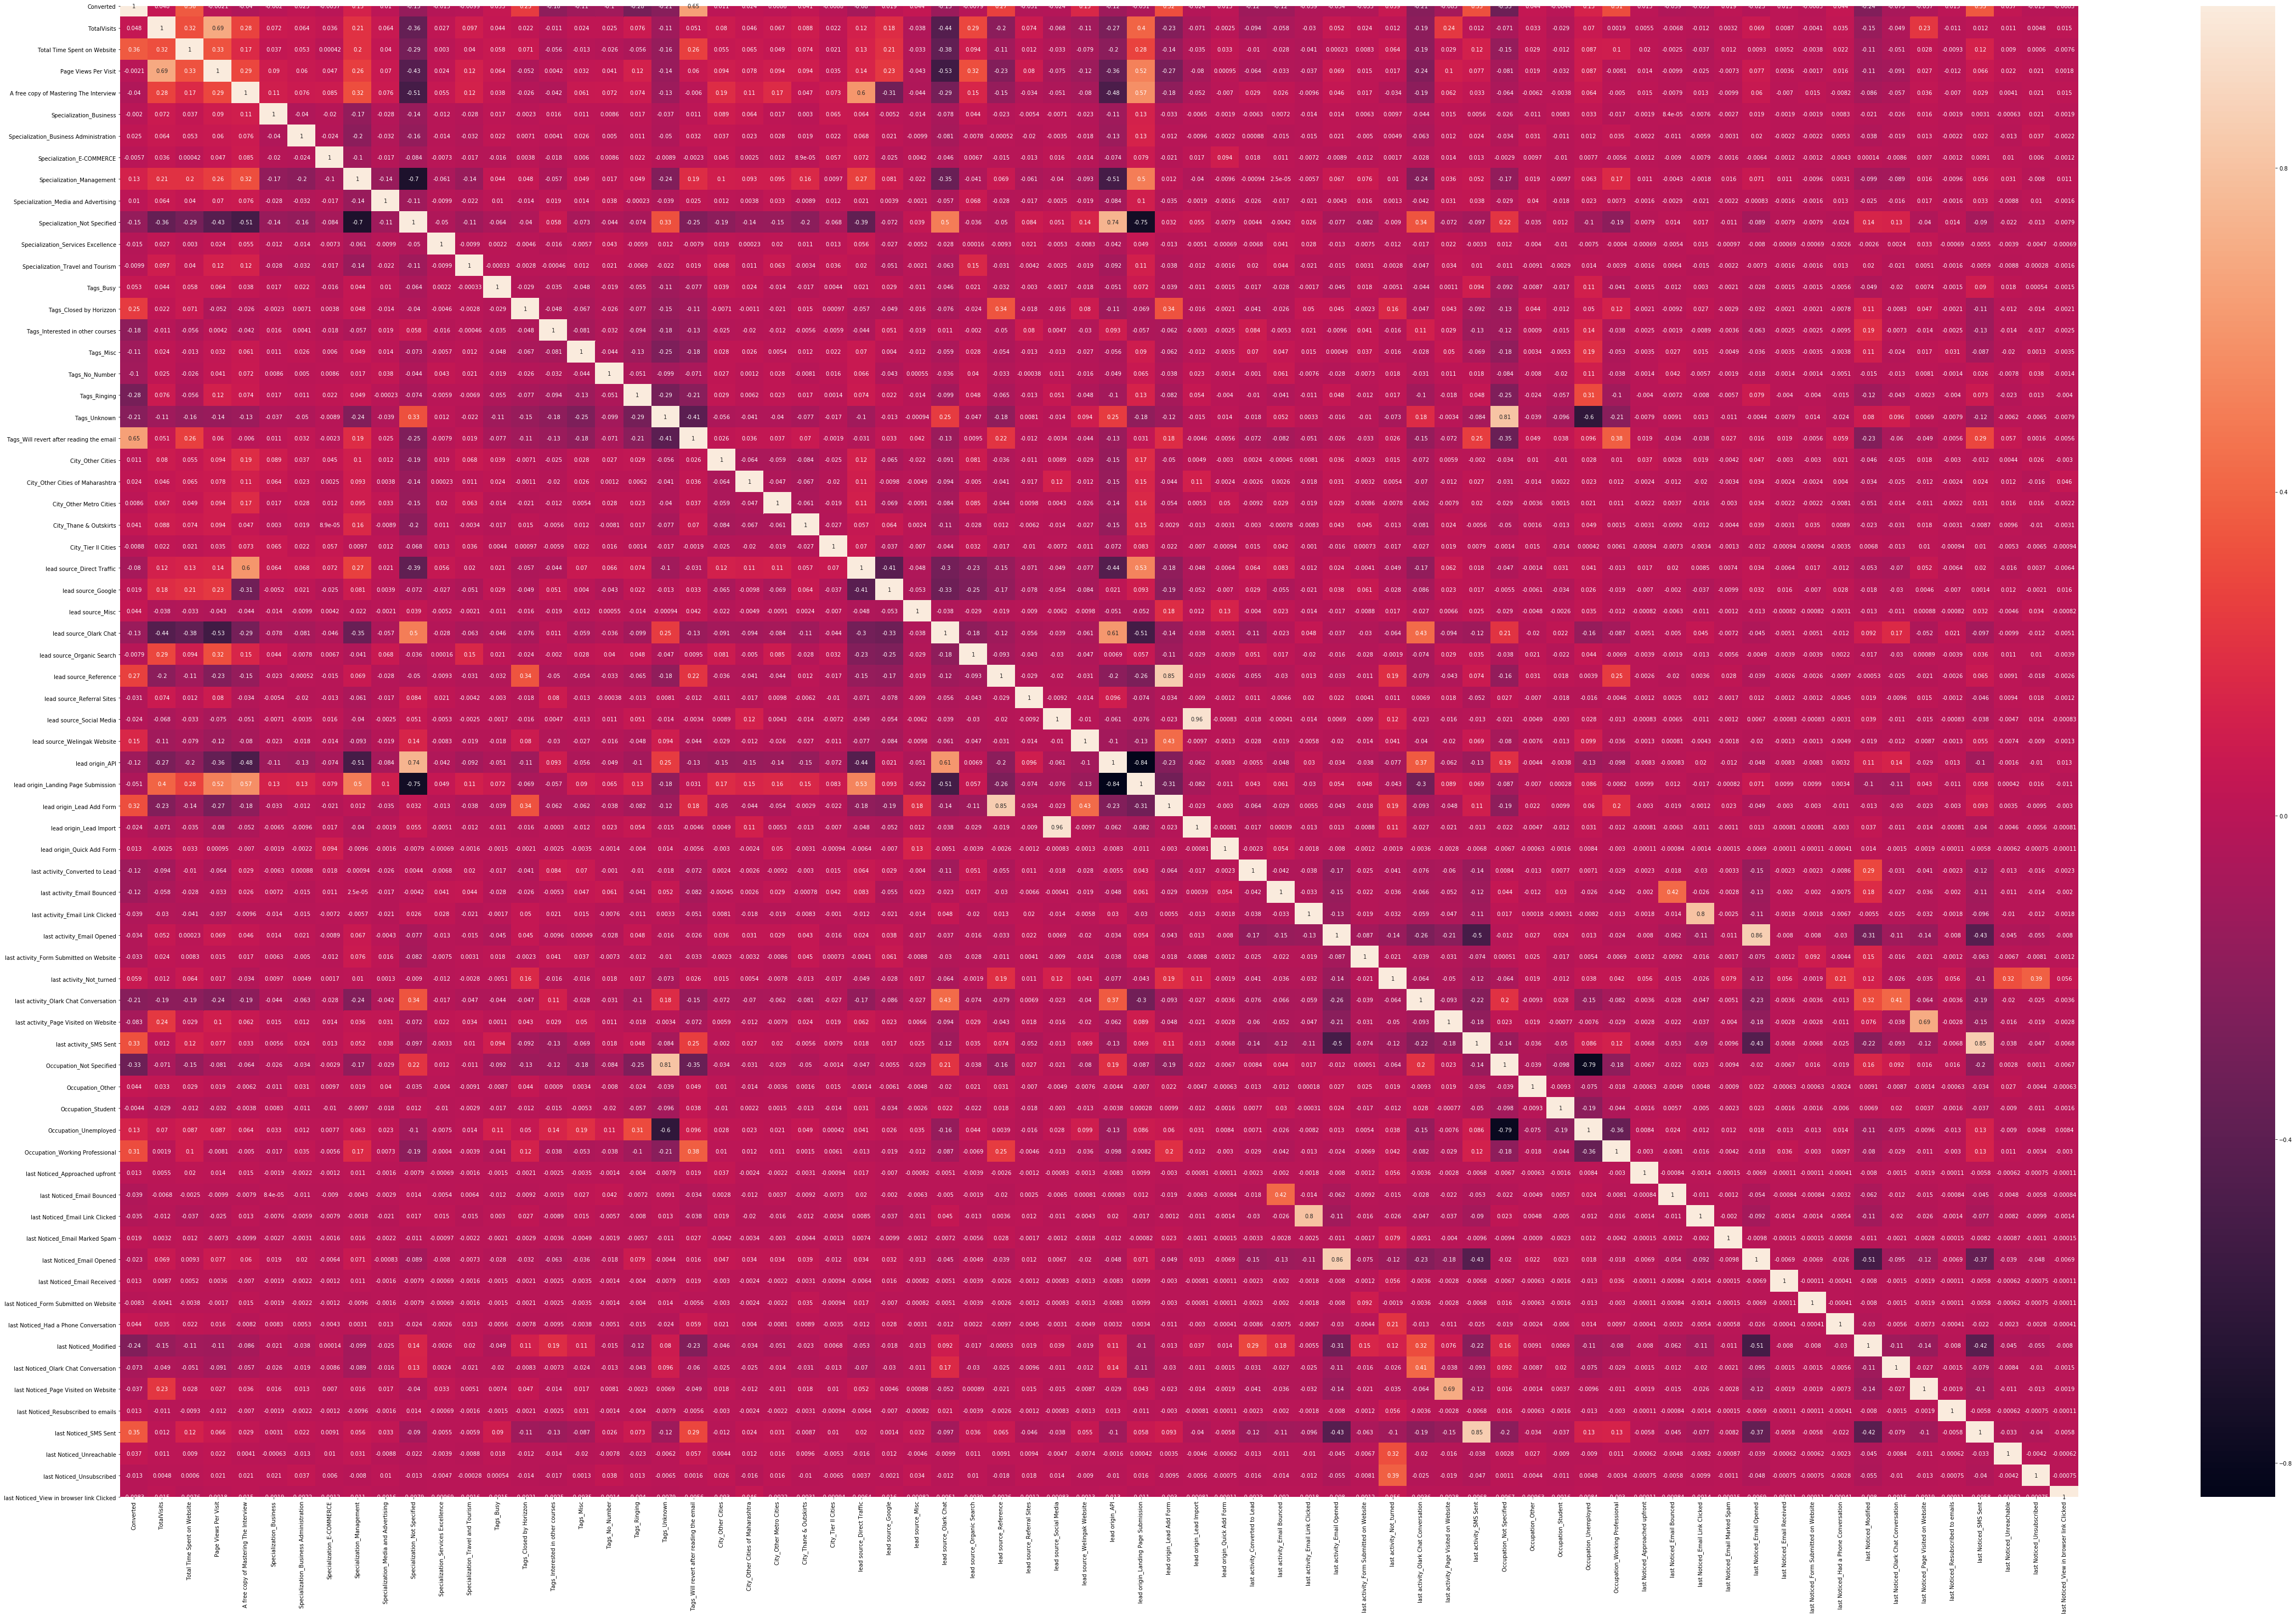

In [877]:
# Let's see the correlation matrix 
plt.figure(figsize = (80,50))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

## Model Building

In [878]:
import statsmodels.api as sm

In [879]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6440
Model:                            GLM   Df Residuals:                     6378
Model Family:                Binomial   Df Model:                           61
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 31 May 2020   Deviance:                          nan
Time:                        23:42:15   Pearson chi2:                 2.92e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                     -7.583e+13   1.06e+07  -7.12e+06      0.000   -7.58e+13   -7.58e+13
TotalVisits                                8.301e+13   1.26e+06    6.6e+07      0.000     8.3e+13     8.3e+13
Total Time Spent on Website                8.322e+13      1e+06   8.31e+07      0.000    8.32e+13    8.32e+13
Page Views Per Visit                      -9.655e+13   1.38e+06  -7.01e+07      0.000   -9.65e+13   -9.65e+13
A free copy of Mastering The Interview     1.061e+14    2.7e+06   3.94e+07      0.000    1.06e+14    1.06e+14
Specialization_Business                   -2.273e+14    6.4e+06  -3.55e+07      0.000   -2.27e+14   -2.27e+14
Specialization_Business Administration    -2.049e+12   6.08e+06  -3.37e+05      0.000   -2.05e+12   -2.05e+12
Specialization_E-COMMERCE                   1.08e+14   8.85e+06   1.22e+07      0.000    1.08e+14    1.08e+14
Specialization_Management                 -9.885e+13   4.66e+06  -2.12e+07      0.000   -9.89e+13   -9.89e+13
Specialization_Media and Advertising      -1.479e+14   7.35e+06  -2.01e+07      0.000   -1.48e+14   -1.48e+14
Specialization_Not Specified              -1.659e+13   5.41e+06  -3.07e+06      0.000   -1.66e+13   -1.66e+13
Specialization_Services Excellence          6.57e+13    1.4e+07   4.69e+06      0.000    6.57e+13    6.57e+13
Specialization_Travel and Tourism         -1.685e+14    7.5e+06  -2.25e+07      0.000   -1.69e+14   -1.69e+14
Tags_Busy                                   1.94e+15   7.12e+06   2.72e+08      0.000    1.94e+15    1.94e+15
Tags_Closed by Horizzon                    2.534e+15   6.39e+06   3.96e+08      0.000    2.53e+15    2.53e+15
Tags_Interested in other courses           1.181e+14   5.33e+06   2.22e+07      0.000    1.18e+14    1.18e+14
Tags_Misc                                   6.18e+14   4.71e+06   1.31e+08      0.000    6.18e+14    6.18e+14
Tags_No_Number                            -4.577e+14   7.59e+06  -6.03e+07      0.000   -4.58e+14   -4.58e+14
Tags_Ringing                              -2.127e+14   4.66e+06  -4.56e+07      0.000   -2.13e+14   -2.13e+14
Tags_Unknown                               2.039e+15   5.04e+06   4.05e+08      0.000    2.04e+15    2.04e+15
Tags_Will revert after reading the email   2.341e+15   4.65e+06   5.04e+08      0.000    2.34e+15    2.34e+15
City_Other Cities                          1.351e+13   3.45e+06   3.92e+06      0.000    1.35e+13    1.35e+13
City_Other Cities of Maharashtra            1.07e+14   3.99e+06   2.68e+07      0.000    1.07e+14    1.07e+14
City_Other Metro Cities                   -1.576e+14    4.4e+06  -3.58e+07      0.000   -1.58e+14   -1.58e+14
City_Thane & Outskirts                    -3.072e+11    3.2e+06  -9.61e+04      0.000   -3.07e+11   -3.07e+11
Cit

In [880]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [881]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [882]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False])

In [883]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 34),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 33),
 ('A free copy of Mastering The Interview', False, 49),
 ('Specialization_Business', False, 35),
 ('Specialization_Business Administration', False, 36),
 ('Specialization_E-COMMERCE', False, 18),
 ('Specialization_Management', False, 37),
 ('Specialization_Media and Advertising', False, 27),
 ('Specialization_Not Specified', False, 31),
 ('Specialization_Services Excellence', False, 39),
 ('Specialization_Travel and Tourism', False, 7),
 ('Tags_Busy', True, 1),
 ('Tags_Closed by Horizzon', True, 1),
 ('Tags_Interested in other courses', True, 1),
 ('Tags_Misc', True, 1),
 ('Tags_No_Number', True, 1),
 ('Tags_Ringing', True, 1),
 ('Tags_Unknown', True, 1),
 ('Tags_Will revert after reading the email', True, 1),
 ('City_Other Cities', False, 43),
 ('City_Other Cities of Maharashtra', False, 40),
 ('City_Other Metro Cities', False, 47),
 ('City_Thane & Outskirts', False, 51),
 ('

In [884]:
col = X_train.columns[rfe.support_]
col

Index(['Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Misc', 'Tags_No_Number',
       'Tags_Ringing', 'Tags_Unknown',
       'Tags_Will revert after reading the email',
       'lead source_Direct Traffic', 'lead source_Referral Sites',
       'lead source_Welingak Website', 'last activity_Email Bounced',
       'last activity_Olark Chat Conversation', 'Occupation_Not Specified',
       'last Noticed_SMS Sent'],
      dtype='object')

In [885]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Specialization_Business',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Management', 'Specialization_Media and Advertising',
       'Specialization_Not Specified', 'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities', 'lead source_Google',
       'lead source_Misc', 'lead source_Olark Chat',
       'lead source_Organic Search', 'lead source_Reference',
       'lead source_Social Media', 'lead origin_API',
       'lead origin_Landing Page Submission', 'lead origin_Lead Add Form',
       'lead origin_Lead Import', 'lead origin_Quick Add Form',
       'last activity_Converted to Lead', 'last activity_Email Link Clicked',
       'last acti

#### Assessing the model with StatsModels

In [886]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6440
Model:                            GLM   Df Residuals:                     6424
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1652.0
Date:                Sun, 31 May 2020   Deviance:                       3304.1
Time:                        23:42:19   Pearson chi2:                 7.44e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.3517      0.583     -7.461      0.000      -5.495      -3.209
Tags_Busy                                    3.7873      0.614      6.173      0.000       2.585       4.990
Tags_Closed by Horizzon                      9.2373      0.919     10.050      0.000       7.436      11.039
Tags_Interested in other courses             0.8479      0.684      1.240      0.215      -0.493       2.188
Tags_Misc                                    3.1153      0.590      5.283      0.000       1.960       4.271
Tags_No_Number                              -1.1165      1.167     -0.957      0.339      -3.404       1.171
Tags_Ringing                                -0.0640      0.626     -0.102      0.918      -1.290       1.162
Tags_Unknown                                 4.5098      0.593      7.611      0.000       3.348       5.671
Tags_Will revert after reading the email     7.3666      0.600     12.270      0.000       6.190       8.543
lead source_Direct Traffic                  -0.2442      0.106     -2.313      0.021      -0.451      -0.037
lead source_Referral Sites                  -0.6205      0.450     -1.379      0.168      -1.502       0.261
lead source_Welingak Website                 3.7556      1.025      3.664      0.000       1.747       5.764
last activity_Email Bounced                 -1.8078      0.347     -5.203      0.000      -2.489      -1.127
last activity_Olark Chat Conversation       -1.3980      0.191     -7.325      0.000      -1.772      -1.024
Occupation_Not Specified                    -1.9980      0.131    -15.220      0.000      -2.255      -1.741
last Noticed_SMS Sent                        1.8135      0.112     16.256      0.000       1.595       2.032
============================================================================================================
"""

### After Building the model, there are couple of variables to be better dropped due to their high p_values. Lets drop Tags_Ringing which has got highest P value first

In [887]:
col = col.drop('Tags_Ringing',1)

#### Lets build model once again and see how's health of model. So, this will be our model 3.

In [888]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6440
Model:                            GLM   Df Residuals:                     6425
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1652.0
Date:                Sun, 31 May 2020   Deviance:                       3304.1
Time:                        23:42:19   Pearson chi2:                 7.45e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.4072      0.220    -20.070      0.000      -4.838      -3.977
Tags_Busy                                    3.8434      0.280     13.721      0.000       3.294       4.392
Tags_Closed by Horizzon                      9.2928      0.744     12.489      0.000       7.834      10.751
Tags_Interested in other courses             0.9035      0.419      2.156      0.031       0.082       1.725
Tags_Misc                                    3.1709      0.233     13.608      0.000       2.714       3.628
Tags_No_Number                              -1.0601      1.030     -1.029      0.303      -3.078       0.958
Tags_Unknown                                 4.5656      0.238     19.143      0.000       4.098       5.033
Tags_Will revert after reading the email     7.4222      0.260     28.537      0.000       6.912       7.932
lead source_Direct Traffic                  -0.2439      0.106     -2.311      0.021      -0.451      -0.037
lead source_Referral Sites                  -0.6206      0.450     -1.379      0.168      -1.503       0.261
lead source_Welingak Website                 3.7556      1.025      3.664      0.000       1.747       5.764
last activity_Email Bounced                 -1.8078      0.347     -5.203      0.000      -2.489      -1.127
last activity_Olark Chat Conversation       -1.3979      0.191     -7.324      0.000      -1.772      -1.024
Occupation_Not Specified                    -1.9980      0.131    -15.221      0.000      -2.255      -1.741
last Noticed_SMS Sent                        1.8121      0.111     16.372      0.000       1.595       2.029
============================================================================================================
"""

### We can still remove another column Tags_No_Number whose P Value is 0.303 and build model 4.

In [889]:
col = col.drop('Tags_No_Number',1)

In [890]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6440
Model:                            GLM   Df Residuals:                     6426
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1652.8
Date:                Sun, 31 May 2020   Deviance:                       3305.6
Time:                        23:42:19   Pearson chi2:                 7.52e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.4739      0.216    -20.665      0.000      -4.898      -4.050
Tags_Busy                                    3.9125      0.277     14.118      0.000       3.369       4.456
Tags_Closed by Horizzon                      9.3603      0.743     12.596      0.000       7.904      10.817
Tags_Interested in other courses             0.9712      0.417      2.327      0.020       0.153       1.789
Tags_Misc                                    3.2396      0.230     14.110      0.000       2.790       3.690
Tags_Unknown                                 4.6336      0.235     19.690      0.000       4.172       5.095
Tags_Will revert after reading the email     7.4904      0.257     29.130      0.000       6.986       7.994
lead source_Direct Traffic                  -0.2479      0.105     -2.351      0.019      -0.455      -0.041
lead source_Referral Sites                  -0.6228      0.450     -1.385      0.166      -1.504       0.259
lead source_Welingak Website                 3.7545      1.025      3.663      0.000       1.746       5.763
last activity_Email Bounced                 -1.8085      0.347     -5.205      0.000      -2.489      -1.128
last activity_Olark Chat Conversation       -1.3989      0.191     -7.330      0.000      -1.773      -1.025
Occupation_Not Specified                    -1.9976      0.131    -15.220      0.000      -2.255      -1.740
last Noticed_SMS Sent                        1.8098      0.111     16.349      0.000       1.593       2.027
============================================================================================================
"""

#### Lets drop one more column "lead source_referral Sites" whose p-value is highest among others remaining and build model 5.

In [891]:
col = col.drop('lead source_Referral Sites',1)

In [892]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6440
Model:                            GLM   Df Residuals:                     6427
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1653.8
Date:                Sun, 31 May 2020   Deviance:                       3307.6
Time:                        23:42:20   Pearson chi2:                 7.54e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.4830      0.216    -20.712      0.000      -4.907      -4.059
Tags_Busy                                    3.9113      0.277     14.117      0.000       3.368       4.454
Tags_Closed by Horizzon                      9.3680      0.743     12.607      0.000       7.912      10.824
Tags_Interested in other courses             0.9472      0.417      2.270      0.023       0.129       1.765
Tags_Misc                                    3.2392      0.230     14.107      0.000       2.789       3.689
Tags_Unknown                                 4.6352      0.235     19.697      0.000       4.174       5.096
Tags_Will revert after reading the email     7.4816      0.257     29.130      0.000       6.978       7.985
lead source_Direct Traffic                  -0.2388      0.105     -2.268      0.023      -0.445      -0.032
lead source_Welingak Website                 3.7611      1.025      3.670      0.000       1.752       5.770
last activity_Email Bounced                 -1.8018      0.347     -5.191      0.000      -2.482      -1.121
last activity_Olark Chat Conversation       -1.4024      0.192     -7.314      0.000      -1.778      -1.027
Occupation_Not Specified                    -2.0013      0.131    -15.254      0.000      -2.258      -1.744
last Noticed_SMS Sent                        1.8154      0.111     16.415      0.000       1.599       2.032
============================================================================================================
"""

### Let's take a look at VIF's to see if any of cols have greater correlation and then decide on which column to drop.

In [893]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [894]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,lead source_Welingak Website,1.10
8,last activity_Email Bounced,1.07
0,Tags_Busy,1.04
1,Tags_Closed by Horizzon,1.02
2,Tags_Interested in other courses,0.31
9,last activity_Olark Chat Conversation,0.31
10,Occupation_Not Specified,0.29
3,Tags_Misc,0.25
11,last Noticed_SMS Sent,0.20
6,lead source_Direct Traffic,0.17


### Although P values are considerably low and VIFs are good for them, looking at z value they look near to center. Also since I am having 12 variables for model, I want to go ahead and remove variables until all P values are 0.

In [895]:
col = col.drop('Tags_Interested in other courses',1)

In [896]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6440
Model:                            GLM   Df Residuals:                     6428
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1656.0
Date:                Sun, 31 May 2020   Deviance:                       3312.0
Time:                        23:42:20   Pearson chi2:                 7.57e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.3037      0.190    -22.653      0.000      -4.676      -3.931
Tags_Busy                                    3.7481      0.259     14.489      0.000       3.241       4.255
Tags_Closed by Horizzon                      9.1903      0.736     12.488      0.000       7.748      10.633
Tags_Misc                                    3.0682      0.206     14.879      0.000       2.664       3.472
Tags_Unknown                                 4.4625      0.212     21.024      0.000       4.046       4.879
Tags_Will revert after reading the email     7.3082      0.236     30.997      0.000       6.846       7.770
lead source_Direct Traffic                  -0.2474      0.105     -2.357      0.018      -0.453      -0.042
lead source_Welingak Website                 3.7576      1.025      3.667      0.000       1.749       5.766
last activity_Email Bounced                 -1.8043      0.347     -5.198      0.000      -2.485      -1.124
last activity_Olark Chat Conversation       -1.4024      0.192     -7.305      0.000      -1.779      -1.026
Occupation_Not Specified                    -1.9985      0.131    -15.259      0.000      -2.255      -1.742
last Noticed_SMS Sent                        1.7872      0.109     16.362      0.000       1.573       2.001
============================================================================================================
"""

### Let's look at VIF to see if any fluctuations are present from previous values.

In [897]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,lead source_Welingak Website,1.10
7,last activity_Email Bounced,1.06
0,Tags_Busy,1.04
1,Tags_Closed by Horizzon,1.02
8,last activity_Olark Chat Conversation,0.30
9,Occupation_Not Specified,0.29
2,Tags_Misc,0.25
10,last Noticed_SMS Sent,0.20
5,lead source_Direct Traffic,0.17
4,Tags_Will revert after reading the email,0.12


#### Looks good to me, no major changes in remaining VIF's. Let's remove last variable with P value greater than 0.

In [898]:
col = col.drop('lead source_Direct Traffic',1)

In [899]:
#Bulding Last and Final Model 7.

In [900]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6440
Model:                            GLM   Df Residuals:                     6429
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1658.8
Date:                Sun, 31 May 2020   Deviance:                       3317.6
Time:                        23:42:21   Pearson chi2:                 7.55e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.3984      0.186    -23.588      0.000      -4.764      -4.033
Tags_Busy                                    3.7668      0.259     14.560      0.000       3.260       4.274
Tags_Closed by Horizzon                      9.2423      0.736     12.562      0.000       7.800      10.684
Tags_Misc                                    3.0723      0.206     14.892      0.000       2.668       3.477
Tags_Unknown                                 4.5157      0.211     21.382      0.000       4.102       4.930
Tags_Will revert after reading the email     7.3419      0.236     31.160      0.000       6.880       7.804
lead source_Welingak Website                 3.8156      1.025      3.722      0.000       1.806       5.825
last activity_Email Bounced                 -1.8505      0.345     -5.361      0.000      -2.527      -1.174
last activity_Olark Chat Conversation       -1.3560      0.191     -7.084      0.000      -1.731      -0.981
Occupation_Not Specified                    -2.0187      0.130    -15.481      0.000      -2.274      -1.763
last Noticed_SMS Sent                        1.7800      0.109     16.330      0.000       1.566       1.994
============================================================================================================
"""

In [901]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,lead source_Welingak Website,1.10
6,last activity_Email Bounced,1.05
0,Tags_Busy,1.04
1,Tags_Closed by Horizzon,1.02
7,last activity_Olark Chat Conversation,0.30
8,Occupation_Not Specified,0.29
2,Tags_Misc,0.24
9,last Noticed_SMS Sent,0.20
4,Tags_Will revert after reading the email,0.12
3,Tags_Unknown,0.10


In [902]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [903]:
y_train_pred[:10]

array([0.83025234, 0.9499522 , 0.75920515, 0.12994171, 0.9499522 ,
       0.12994171, 0.9499522 , 0.00192873, 0.98078888, 0.20979347])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [904]:
y_train_pred_final = pd.DataFrame({'conv_rate':y_train.values, 'conv_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,conv_rate,conv_prob,Prospect ID
0,1,0.830252,7273
1,1,0.949952,8889
2,1,0.759205,7919
3,0,0.129942,2831
4,1,0.949952,7172


#### Creating new column 'predicted' with 1 if conv_prob > 0.5 else 0

In [905]:
y_train_pred_final['Predicted'] = y_train_pred_final.conv_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,conv_rate,conv_prob,Prospect ID,Predicted
0,1,0.830252,7273,1
1,1,0.949952,8889,1
2,1,0.759205,7919,1
3,0,0.129942,2831,0
4,1,0.949952,7172,1


In [906]:
from sklearn import metrics

In [907]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.conv_rate, y_train_pred_final.Predicted )
print(confusion)

[[3761  238]
 [ 458 1983]]


### Here goes the matrix:
#### True Negatives 3761, False Negatives: 458, False Positives: 238, True Negatives: 1983

### How about checking accuracy of model?

In [908]:
print(metrics.accuracy_score(y_train_pred_final.conv_rate, y_train_pred_final.Predicted))

0.8919254658385093


### ~90% accuracy obtained from model which is good.

### Metrics beyond simply accuracy

In [909]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [910]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8123719786972552

In [911]:
# Let us calculate specificity
TN / float(TN+FP)

0.9404851212803201

In [912]:
# Calculate false postive rate - predicting conversion when customer does not convert
print(FP/ float(TN+FP))

0.05951487871967992


In [913]:
# positive predictive value 
print (TP / float(TP+FP))

0.8928410625844214


In [914]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8914434700165916


## Plotting the ROC Curve

In [915]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [916]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.conv_rate, y_train_pred_final.conv_prob, drop_intermediate = False )

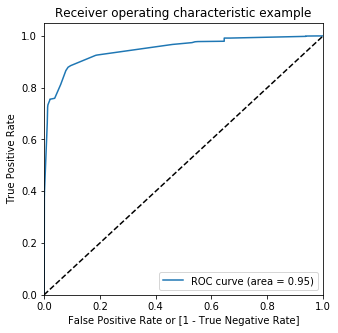

In [917]:
draw_roc(y_train_pred_final.conv_rate, y_train_pred_final.conv_prob)

### Finding Optimal Cutoff Point

In [918]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.conv_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,conv_rate,conv_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.830252,7273,1,1,1,1,1,1,1,1,1,1,0
1,1,0.949952,8889,1,1,1,1,1,1,1,1,1,1,1
2,1,0.759205,7919,1,1,1,1,1,1,1,1,1,0,0
3,0,0.129942,2831,0,1,1,0,0,0,0,0,0,0,0
4,1,0.949952,7172,1,1,1,1,1,1,1,1,1,1,1


In [919]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.conv_rate, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379037  1.000000  0.000000
0.1   0.1  0.701398  0.967227  0.539135
0.2   0.2  0.856832  0.925031  0.815204
0.3   0.3  0.900776  0.879148  0.913978
0.4   0.4  0.900776  0.866039  0.921980
0.5   0.5  0.891925  0.812372  0.940485
0.6   0.6  0.885093  0.759115  0.961990
0.7   0.7  0.894410  0.755428  0.979245
0.8   0.8  0.890528  0.733716  0.986247
0.9   0.9  0.866770  0.667349  0.988497


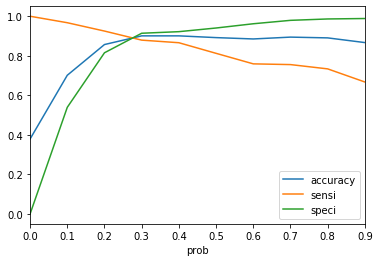

In [920]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [921]:
y_train_pred_final['final_predicted'] = y_train_pred_final.conv_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,conv_rate,conv_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.830252,7273,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.949952,8889,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.759205,7919,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.129942,2831,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.949952,7172,1,1,1,1,1,1,1,1,1,1,1,1


In [922]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.conv_prob.map( lambda x: round(x*100))

y_train_pred_final[['conv_rate','conv_prob','Prospect ID','final_predicted','Lead_Score']].head()

,conv_rate,conv_prob,Prospect ID,final_predicted,Lead_Score
0,1,0.830252,7273,1,83
1,1,0.949952,8889,1,95
2,1,0.759205,7919,1,76
3,0,0.129942,2831,0,13
4,1,0.949952,7172,1,95


### Let's once again run accuracy test and other factors .

In [923]:
metrics.accuracy_score(y_train_pred_final.conv_rate, y_train_pred_final.final_predicted)

0.900776397515528

In [924]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.conv_rate, y_train_pred_final.final_predicted )
confusion2

array([[3655,  344],
       [ 295, 2146]], dtype=int64)

In [925]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [926]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8791478902089308

In [927]:
# Let us calculate specificity
TN / float(TN+FP)

0.9139784946236559

### With ROC having 95% sensitivity 88% and specificity 91% this model is good to go and to extrapolate to test data

In [928]:
# Calculate false postive rate - predicting converted when customer didn't convert
print(FP/ float(TN+FP))

0.08602150537634409


In [929]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8618473895582329


In [930]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9253164556962026


## Precision and Recall

In [931]:
confusion = metrics.confusion_matrix(y_train_pred_final.conv_rate, y_train_pred_final.final_predicted )
confusion 

array([[3655,  344],
       [ 295, 2146]], dtype=int64)

#### Precision
### TP / TP + FP

In [932]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8618473895582329

#### Recall
### TP / TP + FN

In [933]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8791478902089308

In [934]:
from sklearn.metrics import precision_score, recall_score

In [935]:
precision_score(y_train_pred_final.conv_rate , y_train_pred_final.final_predicted)

0.8618473895582329

In [936]:
recall_score(y_train_pred_final.conv_rate, y_train_pred_final.final_predicted)

0.8791478902089308

In [937]:
from sklearn.metrics import precision_recall_curve

In [938]:
y_train_pred_final.conv_rate, y_train_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.conv_rate, y_train_pred_final.conv_prob)

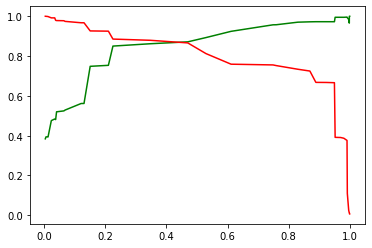

In [939]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [940]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [941]:
X_test = X_test[col]
X_test.head()

,Tags_Busy,Tags_Closed by Horizzon,Tags_Misc,Tags_Unknown,Tags_Will revert after reading the email,lead source_Welingak Website,last activity_Email Bounced,last activity_Olark Chat Conversation,Occupation_Not Specified,last Noticed_SMS Sent
7567,0,0,0,1,0,0,0,0,1,0
851,0,0,0,0,1,0,0,0,0,0
7228,0,0,0,1,0,0,0,0,0,1
6088,0,0,0,1,0,0,0,0,0,1
4857,0,0,0,1,0,0,0,0,1,1


In [942]:
X_test_sm = sm.add_constant(X_test)

In [943]:
###Let's begin prediction for test set

In [944]:
y_test_pred = res.predict(X_test_sm)

In [945]:
y_test_pred[:10]

7567    0.129942
851     0.949952
7228    0.869580
6088    0.869580
4857    0.469663
6292    0.003159
2292    0.209793
4418    0.759205
5819    0.991193
8436    0.129942
dtype: float64

In [946]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [947]:
# Let's see the head
y_pred_1.head()

,0
7567,0.129942
851,0.949952
7228,0.869580
6088,0.869580
4857,0.469663


In [948]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [949]:
# Putting 'Prospect ID' to index
y_test_df['Prospect ID'] = y_test_df.index

In [950]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [951]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [952]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7567,0.129942
1,1,851,0.949952
2,1,7228,0.869580
3,1,6088,0.869580
4,1,4857,0.469663


In [953]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'conv_prob'})

In [954]:
y_pred_final.head()

,Converted,Prospect ID,conv_prob
0,0,7567,0.129942
1,1,851,0.949952
2,1,7228,0.869580
3,1,6088,0.869580
4,1,4857,0.469663


In [955]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','conv_prob']]

In [956]:
y_pred_final['Lead_Score'] = y_pred_final.conv_prob.map( lambda x: round(x*100))

In [957]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,conv_prob,Lead_Score
0,7567,0,0.129942,13
1,851,1,0.949952,95
2,7228,1,0.869580,87
3,6088,1,0.869580,87
4,4857,1,0.469663,47


In [958]:
y_pred_final['final_Predicted'] = y_pred_final.conv_prob.map(lambda x: 1 if x > 0.3 else 0)

In [959]:
y_pred_final.head()

,Prospect ID,Converted,conv_prob,Lead_Score,final_Predicted
0,7567,0,0.129942,13,0
1,851,1,0.949952,95,1
2,7228,1,0.869580,87,1
3,6088,1,0.869580,87,1
4,4857,1,0.469663,47,1


In [960]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9036580948931546

In [961]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1495,  160],
       [ 106, 1000]], dtype=int64)

In [962]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [963]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9041591320072333

In [964]:
# Let us calculate specificity
TN / float(TN+FP)

0.9033232628398792

In [965]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8620689655172413

In [966]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9041591320072333

# Conclusion: 
### Test Sensitivity 90%        Train Sensitivity 88
### Test Specificity 90%        Train Specificity 91%
### Test Accuracy   90%         Train Accuracy  90%
## Model looks promosing and able to predict convert well.